In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
#import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [3]:
TEST_DIR= r"C:\Users\anany\Desktop\project\data\test\test"
TRAIN_DIR  = r'C:\Users\anany\Desktop\project\data\train\train'

In [4]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for filename in os.listdir(label_dir):
                image_path = os.path.join(label_dir, filename)
                image_paths.append(image_path)
                labels.append(label)
            print(label, "Completed")
        
    return image_paths, labels

In [5]:
# Convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)

# Shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,C:\Users\anany\Desktop\project\data\train\trai...,neutral
1,C:\Users\anany\Desktop\project\data\train\trai...,happy
2,C:\Users\anany\Desktop\project\data\train\trai...,angry
3,C:\Users\anany\Desktop\project\data\train\trai...,neutral
4,C:\Users\anany\Desktop\project\data\train\trai...,fear


In [8]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,C:\Users\anany\Desktop\project\data\test\test\...,angry
1,C:\Users\anany\Desktop\project\data\test\test\...,angry
2,C:\Users\anany\Desktop\project\data\test\test\...,angry
3,C:\Users\anany\Desktop\project\data\test\test\...,angry
4,C:\Users\anany\Desktop\project\data\test\test\...,angry


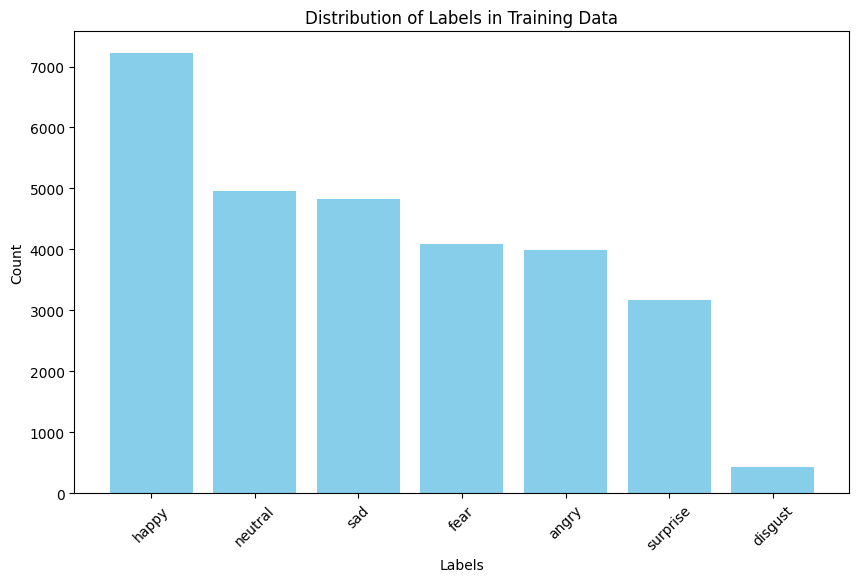

In [9]:
# Plot the distribution of labels using matplotlib
label_counts = train['label'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.title('Distribution of Labels in Training Data')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

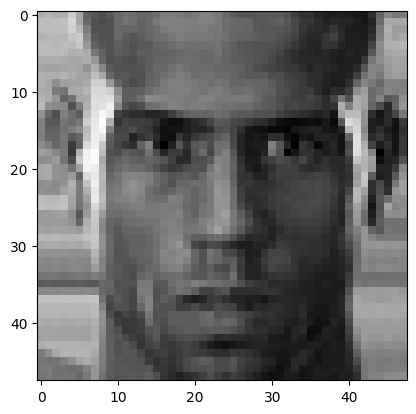

In [10]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

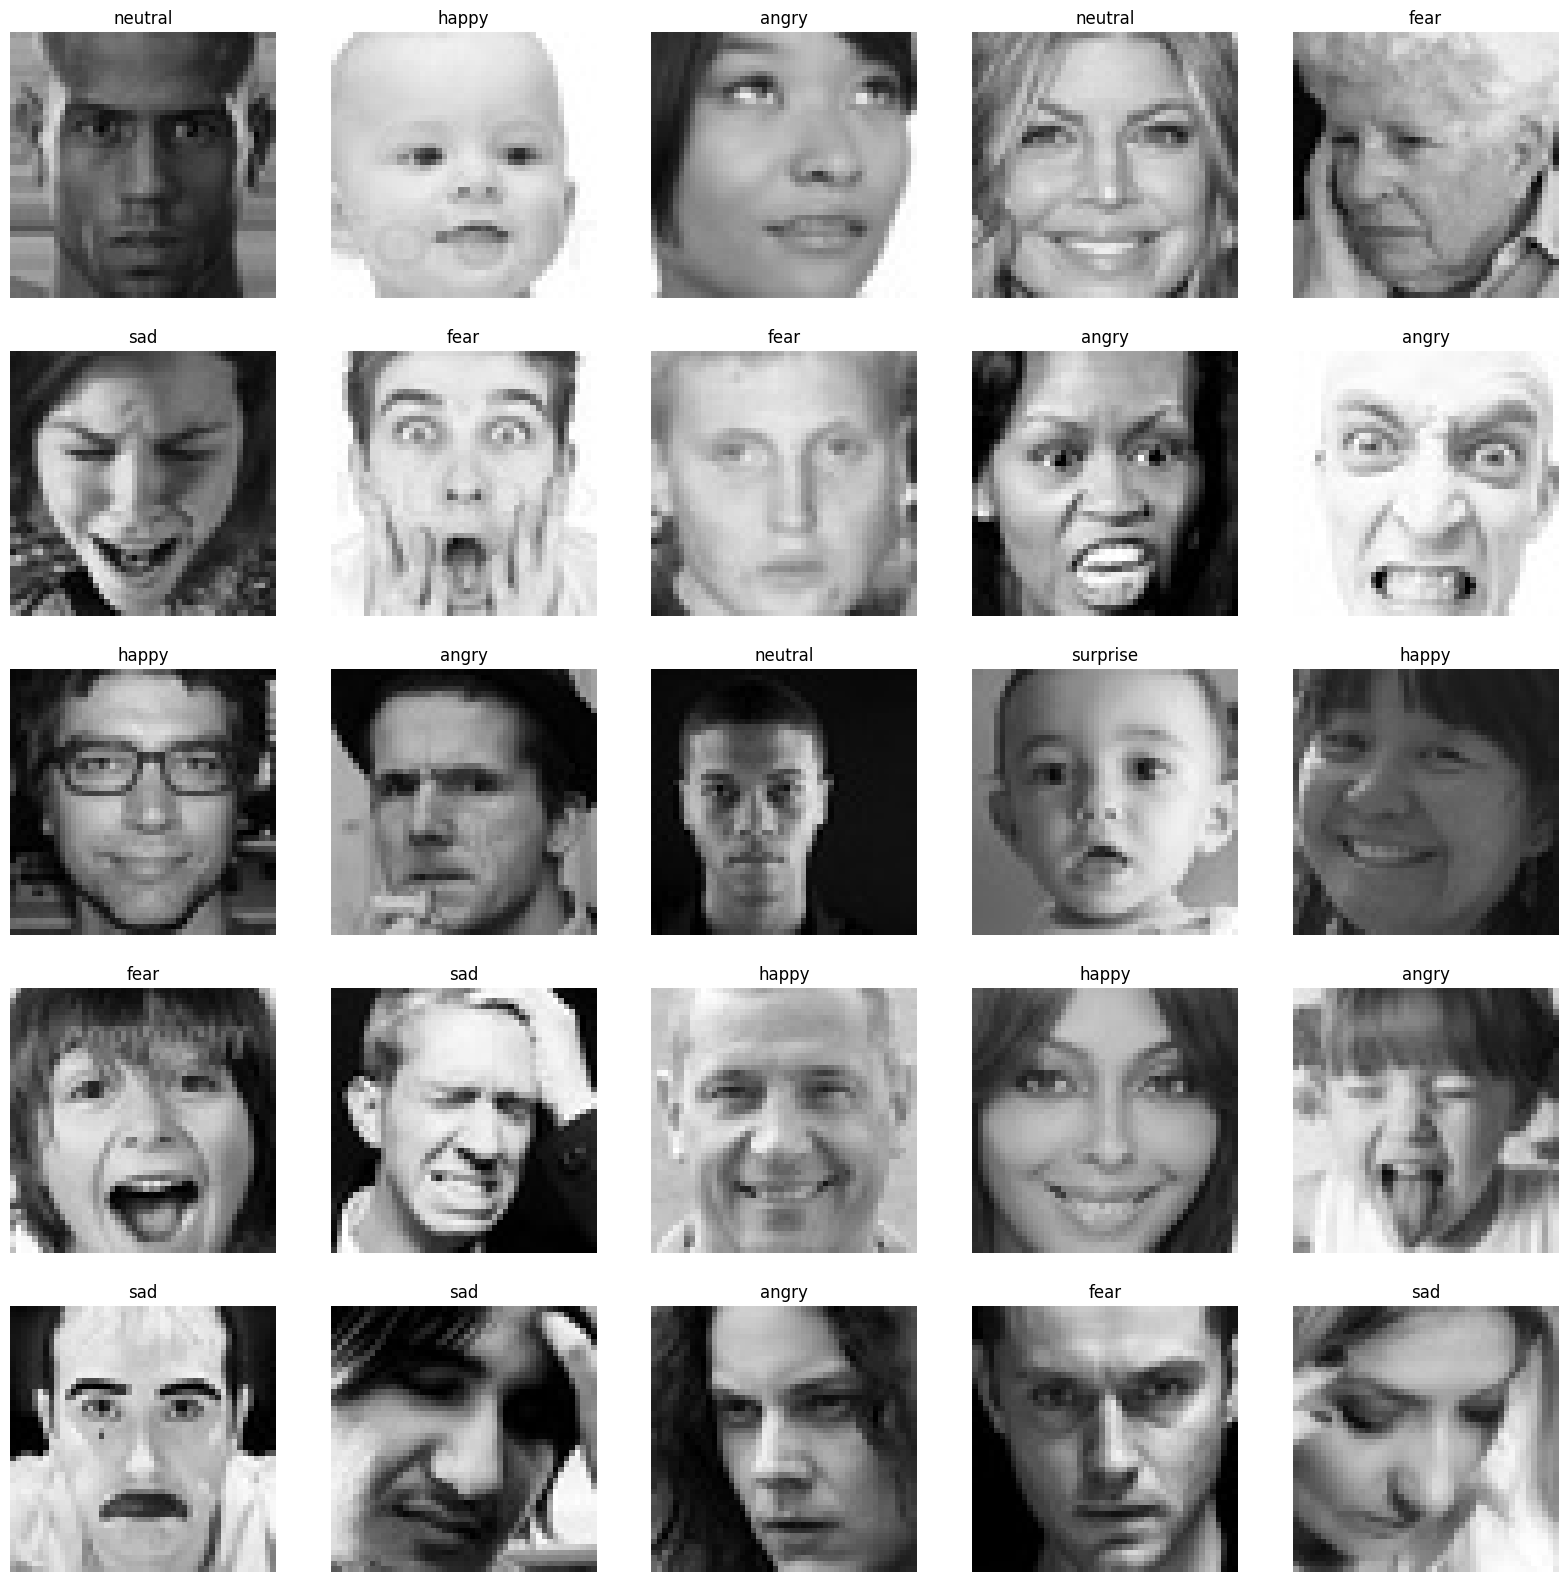

In [11]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [12]:
from keras.preprocessing.image import load_img, img_to_array

def extract_features(images):
    features = []
    for image in tqdm(images, desc="Extracting features"):
        img = load_img(image, color_mode='grayscale')  # Change 1: Updated load_img call
        img = img_to_array(img)  # Change 2: Added img_to_array conversion
        features.append(img)
    return np.array(features)


In [13]:
from tqdm import tqdm 
train_features = extract_features(train['image'])

Extracting features: 100%|███████████████████████████████████████████████████████| 28709/28709 [18:52<00:00, 25.34it/s]


In [14]:
test_features = extract_features(test['image'])

Extracting features: 100%|█████████████████████████████████████████████████████████| 7178/7178 [01:22<00:00, 86.57it/s]


In [15]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [16]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [18]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0.])

In [19]:
# config
input_shape = (48, 48, 1)
output_class = 7

In [20]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


In [21]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=120, validation_data=(x_test, y_test))

Epoch 1/120
225/225 ━━━━━━━━━━━━━━━━━━━━ 564s 2s/step - accuracy: 0.2354 - loss: 1.8385 - val_accuracy: 0.2471 - val_loss: 1.8138
Epoch 2/120
225/225 ━━━━━━━━━━━━━━━━━━━━ 747s 3s/step - accuracy: 0.2533 - loss: 1.8069 - val_accuracy: 0.2811 - val_loss: 1.7298
Epoch 3/120
225/225 ━━━━━━━━━━━━━━━━━━━━ 717s 3s/step - accuracy: 0.2890 - loss: 1.7327 - val_accuracy: 0.3752 - val_loss: 1.6146
Epoch 4/120
225/225 ━━━━━━━━━━━━━━━━━━━━ 791s 3s/step - accuracy: 0.3576 - loss: 1.6227 - val_accuracy: 0.4259 - val_loss: 1.4649
Epoch 5/120
225/225 ━━━━━━━━━━━━━━━━━━━━ 578s 3s/step - accuracy: 0.4052 - loss: 1.5141 - val_accuracy: 0.4457 - val_loss: 1.3828
Epoch 6/120
225/225 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - accuracy: 0.4404 - loss: 1.4451 - val_accuracy: 0.4876 - val_loss: 1.3162
Epoch 7/120
225/225 ━━━━━━━━━━━━━━━━━━━━ 413s 2s/step - accuracy: 0.4701 - loss: 1.3876 - val_accuracy: 0.5085 - val_loss: 1.2766
Epoch 8/120
225/225 ━━━━━━━━━━━━━━━━━━━━ 476s 2s/step - accuracy: 0.4756 - loss: 1.3558 - 

KeyboardInterrupt: 

In [24]:
# Plot training & validation accuracy values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

NameError: name 'history' is not defined

Original Output: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
Predicted Output: happy


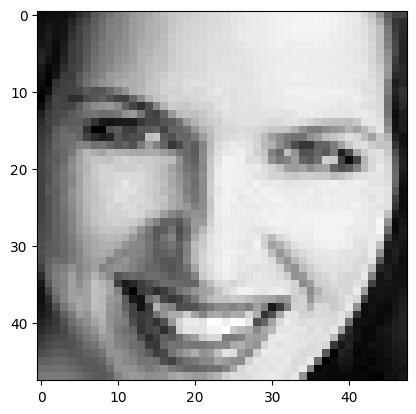

In [25]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted Output: happy


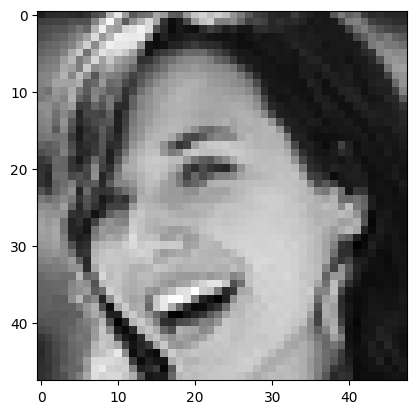

In [26]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted Output: neutral


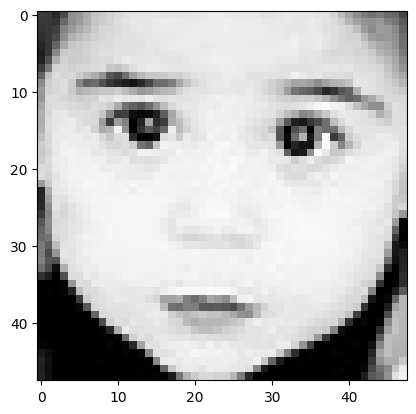

In [27]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

In [28]:
import pickle
# Save the entire model to HDF5
model.save("final_model.h5")

# Save the training configuration (if needed)
with open("model_config.pkl", "wb") as config_file:
    pickle.dump({"optimizer": "adam", "loss": "categorical_crossentropy", "metrics": ["accuracy"]}, config_file)